# Step 2 - Climate App





Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.
- Use FLASK to create your routes.

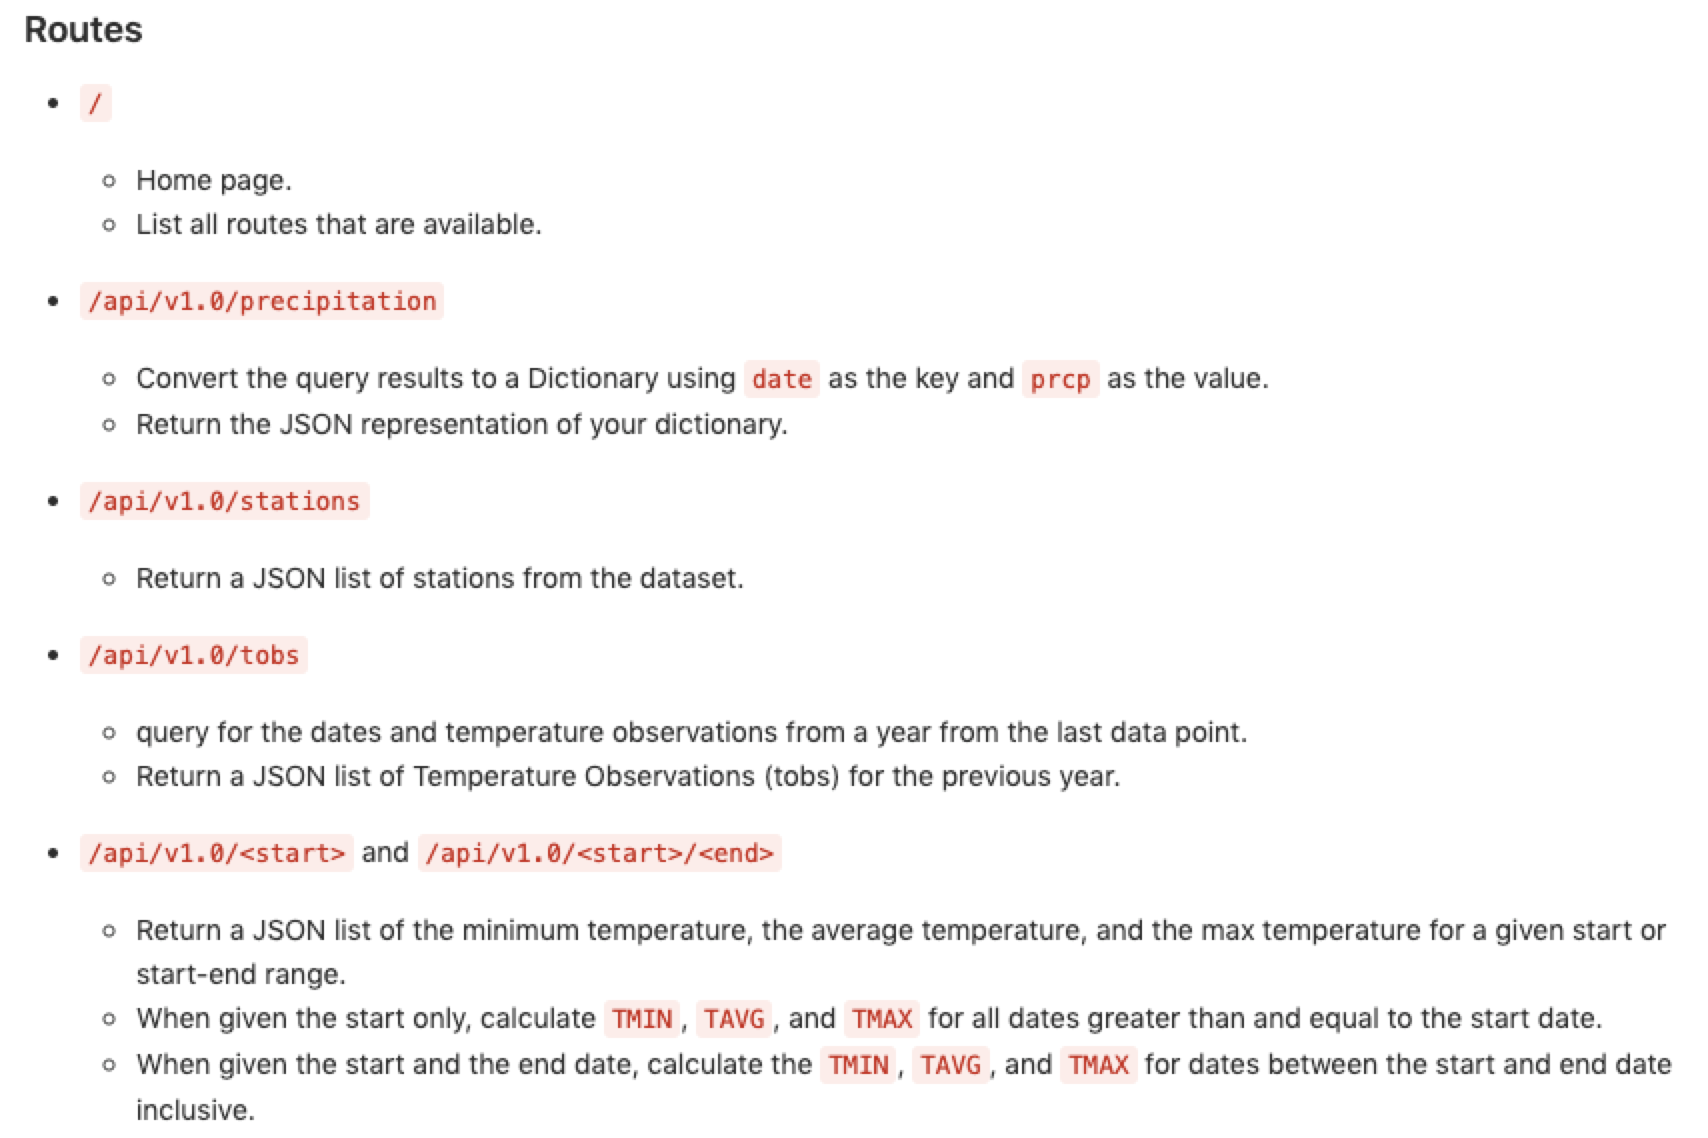

In [ ]:
#Dependencies
import datetime as dt
import numpy as np
import pandas as pd

#SQL
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from flask import Flask, jsonify

# Data Setup

In [ ]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [ ]:
# We can view all of the classes that automap found
Base.classes.keys()

In [ ]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

In [ ]:
# Query to retrieve the last 12 months of precipitation data (from climate starter)
date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
date

In [ ]:
# Calculate the date 1 year ago from the last data point in the database
one_year_prior = (dt.date(2017,8,23)-dt.timedelta(days=365))
print(f"The first date of record is {one_year_prior}.")

# Flask Setup

In [ ]:
app = Flask(__name__)
app

- /

  - Home page.
  - List all routes that are available.

In [ ]:
#Flask Routes
@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"/api/v1.0/precipitation")

- /api/v1.0/precipitation

  - Convert the query results to a Dictionary using date as the key and prcp as the value.
  - Return the JSON representation of your dictionary.

In [ ]:
@app.route("/api/v1.0/precipitation")
def precipitation():
    #query all precip data since one year prior 
    precip_results = session.query(Measurement.date, func.avg(Measurement.prcp)).filter(Measurement.date >= one_year_prior).group_by(Measurement.date).all()
    return jsonify(precip_results)
#no errors

- /api/v1.0/stations
   - Return a JSON list of stations from the dataset.

In [ ]:
@app.route("/api/v1.0/stations")
def stations():
    # Query all stations
    station_results = session.query(Station.station, Station.name).all()
    return jsonify(station_results)


- /api/v1.0/tobs
   - query for the dates and temperature observations from a year from the last data point.
   - Return a JSON list of Temperature Observations (tobs) for the previous year.

In [ ]:
@app.route("/api/v1.0/tobs")
def tobs():
    # Query all tobs
    station_results = session.query(Station.station, Station.name).all()
    return jsonify(station_results)


- /api/v1.0/<start> and /api/v1.0/<start>/<end>

   - Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
   - When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.
   - When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.

In [ ]:
@app.route("/api/v1.0/<start>")
def start(start):
    start_results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.date >= start).all()
    return jsonify(start_results)
start

In [ ]:
@app.route("/api/v1.0/<start>/<end>")
def start_end(start,end):
    start_end = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    return jsonify(start_end)
start_end

In [ ]:
if __name__ == "__main__":
    app.run(debug=True)